<a href="https://colab.research.google.com/github/MariiaZimokha/DeepLearning.AI/blob/main/C3/W4/assignment/C3_W4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 33.9MB/s]


In [15]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) # Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences=True)))# An LSTM Layer)
model.add(Dropout(0.2)) # A dropout layer)
model.add(LSTM(100))# Another LSTM Layer)
model.add(Dense(total_words, kernel_regularizer=regularizers.L2(0.01))) # A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax')) # A Dense Layer)

# Pick an optimizer
model.compile(
    loss='categorical_crossentropy', 
    optimizer="adam", 
    metrics=['accuracy']
)# Pick a loss function and an optimizer)
### END CODE HERE
    
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 10, 300)           301200    
_________________________________________________________________
dropout_9 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_8 (Dense)              (None, 3211)              324311    
_________________________________________________________________
dense_9 (Dense)              (None, 3211)              10313732  
Total params: 11,420,743
Trainable params: 11,420,743
Non-trainable params: 0
__________________________________________

In [16]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 62s 23ms/step - loss: 6.9389 - accuracy: 0.0224
Epoch 2/100
484/484 [==============================] - 10s 21ms/step - loss: 6.4986 - accuracy: 0.0290
Epoch 3/100
484/484 [==============================] - 10s 21ms/step - loss: 6.3652 - accuracy: 0.0338
Epoch 4/100
484/484 [==============================] - 10s 20ms/step - loss: 6.2406 - accuracy: 0.0388
Epoch 5/100
484/484 [==============================] - 10s 21ms/step - loss: 6.1164 - accuracy: 0.0443
Epoch 6/100
484/484 [==============================] - 10s 21ms/step - loss: 5.9919 - accuracy: 0.0497
Epoch 7/100
484/484 [==============================] - 10s 21ms/step - loss: 5.8390 - accuracy: 0.0575
Epoch 8/100
484/484 [==============================] - 10s 20ms/step - loss: 5.6861 - accuracy: 0.0636
Epoch 9/100
484/484 [==============================] - 10s 20ms/step - loss: 5.5336 - accuracy: 0.0711
Epoch 10/100
484/484 [==============================] - 10s 21ms/step - l

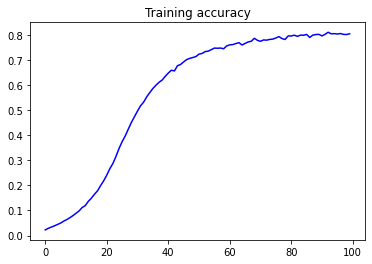

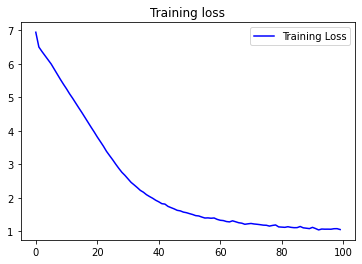

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [19]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted_x = model.predict(token_list, verbose=0)
	predicted = np.argmax(predicted_x,axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope eye mine eye untrue back convertest to groan old pride cannot hate with remember thee better well back me doth truly show thee thee ' last to thee shouldst gone so love my monument ' lived doth dull flesh or youth convertest thee near me shall grow shines so shame sort thee made thee by men you gone thee in my knowledge doth doom as doth grow ' stay blot thine age brings scorn to change a brow light cherish light crave light last to thyself canst move leave me told not see where you be hate for you must
